In [1]:
import os, warnings
from pathlib import Path

import numpy as np
import dynamo as dyn
import spateo as st
import scanpy as sc
warnings.filterwarnings('ignore')

/home/pc001/anaconda3/envs/BioProjects/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/pc001/anaconda3/envs/BioProjects/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/pc001/anaconda3/envs/BioProjects/lib/python3.8/site-packag

## Load the data

In [2]:
sample_id = "E7_8h"
os.chdir(f"/media/pc001/Yao/Projects/Project_drosophila/Data_v4/migration-hotspot/drosophila_{sample_id}_germ_layer_new")
cpo = [(41, 1209, 57), (13, 8, -3), (0, 0, 1)]

tissue_names = ['CNS',  'Midgut', 'Hindgut', 'Muscle', 'SalivaryGland']
tissue_sample_ids = ["CNS", "midgut", "hindgut", "muscle", "salivary gland"]

out_image_path = f"image/germband_models"
Path(out_image_path).mkdir(parents=True, exist_ok=True)

In [5]:
import anndata as ad
tissue_adatas = [st.read_h5ad(f"h5ad/{sample_id}_mapping_{tissue_sample_ids[i]}.h5ad") for i, tissue_name in enumerate(tissue_names)]

germ_adata = ad.concat(adatas=tissue_adatas, join="outer", fill_value=0)
germ_adata.obsm["3d_align_spatial"] = germ_adata.obsm["tdr_spatial"]

germ_pc, _ = st.tdr.construct_pc(
    adata=germ_adata.copy(),
    spatial_key="3d_align_spatial",
    groupby="anno_tissue_new",
    key_added="tissue",
    colormap={"amnioserosa": "#bdcf32", "CNS": "#ea5545", "hindgut": "#27aeef", "midgut": "#87bc45", "muscle": "#f46a9b", "salivary gland": "#ef9b20",},
)
new_germ_pc = st.tdr.interactive_rectangle_clip(model=germ_pc, key="tissue", invert=True)[0]
obs_index = np.asarray(new_germ_pc.point_data["obs_index"])
new_germ_adata = germ_adata[obs_index, :].copy()
new_germ_adata

IndexError: list index out of range

In [10]:
germ_adata.obsm["3d_align_spatial"][:, 0].max() - germ_adata.obsm["3d_align_spatial"][:, 0].min()

486.44204986991076

In [11]:
germ_adata.obsm["3d_align_spatial"][:, 1].max() - germ_adata.obsm["3d_align_spatial"][:, 1].min()

154.44985099138245

In [12]:
germ_adata.obsm["3d_align_spatial"][:, 2].max() - germ_adata.obsm["3d_align_spatial"][:, 2].min()

186.08488010288556

In [62]:
adata = st.read_h5ad(f"h5ad/{sample_id}_cellbin_v2.h5ad")
epidermis_adata = adata[adata.obs["anno_tissue_new"] == "epidermis", :]
epidermis_adata.obsm["3d_align_spatial"] = epidermis_adata.obsm["tdr_spatial"]
epidermis_pc, _ = st.tdr.construct_pc(
    adata=epidermis_adata.copy(),
    spatial_key="3d_align_spatial",
    groupby="anno_tissue_new",
    key_added="tissue",
    colormap={"epidermis": "#ece05a"},
)
new_epidermis_pc = st.tdr.interactive_rectangle_clip(model=epidermis_pc, key="tissue", invert=True)[0]
obs_index = np.asarray(new_epidermis_pc.point_data["obs_index"])
new_epidermis_adata = epidermis_adata[obs_index, :].copy()
new_epidermis_adata

AnnData object with n_obs × n_vars = 7839 × 8136
    obs: 'area', 'slices', 'anno_cell_type', 'anno_tissue', 'anno_germ_layer', 'actual_stage', 'scc', 'anno_tissue_new'
    var: 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable'
    uns: '__type', 'hvg', 'neighbors', 'pp', 'scc', 'scc_colors', 'slices_colors', 'spatial_neighbors'
    obsm: '2d_realign_spatial', 'X_pca', 'X_umap', 'raw_spatial', 'tdr_spatial', '3d_align_spatial'
    layers: 'X_counts', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [63]:
new_germ_adata = ad.concat(adatas=[new_germ_adata, new_epidermis_adata], join="outer", fill_value=0)
new_germ_adata

AnnData object with n_obs × n_vars = 20424 × 8136
    obs: 'area', 'slices', 'anno_cell_type', 'anno_tissue', 'anno_germ_layer', 'actual_stage', 'scc', 'anno_tissue_new', 'V_z', 'anno_germ_layer_new'
    obsm: '2d_realign_spatial', '3d_align_spatial', 'V_cells_mapping', 'X_cells_mapping', 'X_pca', 'X_umap', 'raw_spatial', 'tdr_spatial'
    layers: 'X_counts', 'spliced', 'unspliced'

## generate original point cloud model

In [67]:
germ_pc, _ = st.tdr.construct_pc(
    adata=new_germ_adata.copy(),
    spatial_key="3d_align_spatial",
    groupby="anno_tissue_new",
    key_added="tissue",
    colormap={"epidermis": "#ece05a", "amnioserosa": "#bdcf32", "CNS": "#ea5545", "hindgut": "#27aeef", "midgut": "#87bc45", "muscle": "#f46a9b", "salivary gland": "#ef9b20",},
)

germ_layers = {
    "epidermis": "ectoderm", "CNS": "ectoderm", "salivary gland": "ectoderm", "hindgut": "ectoderm",
    "muscle": "mesoderm", "midgut": "endoderm", #  "amnioserosa": "extraembryonic", "yolk": "extra-embryonic", 
}
new_germ_adata = new_germ_adata[new_germ_adata.obs["anno_tissue_new"].isin([i for i in germ_layers.keys()]), :]
new_germ_adata.obs["anno_germ_layer_new"] = new_germ_adata.obs["anno_tissue_new"].map(lambda x: germ_layers[str(x)])

obs_index = germ_pc.point_data["obs_index"].tolist()
st.tdr.add_model_labels(model=germ_pc, labels=new_germ_adata[obs_index, :].obs["anno_germ_layer_new"].values, key_added="germ_layer", where="point_data", inplace=True, colormap="Spectral_r")

(None, None)

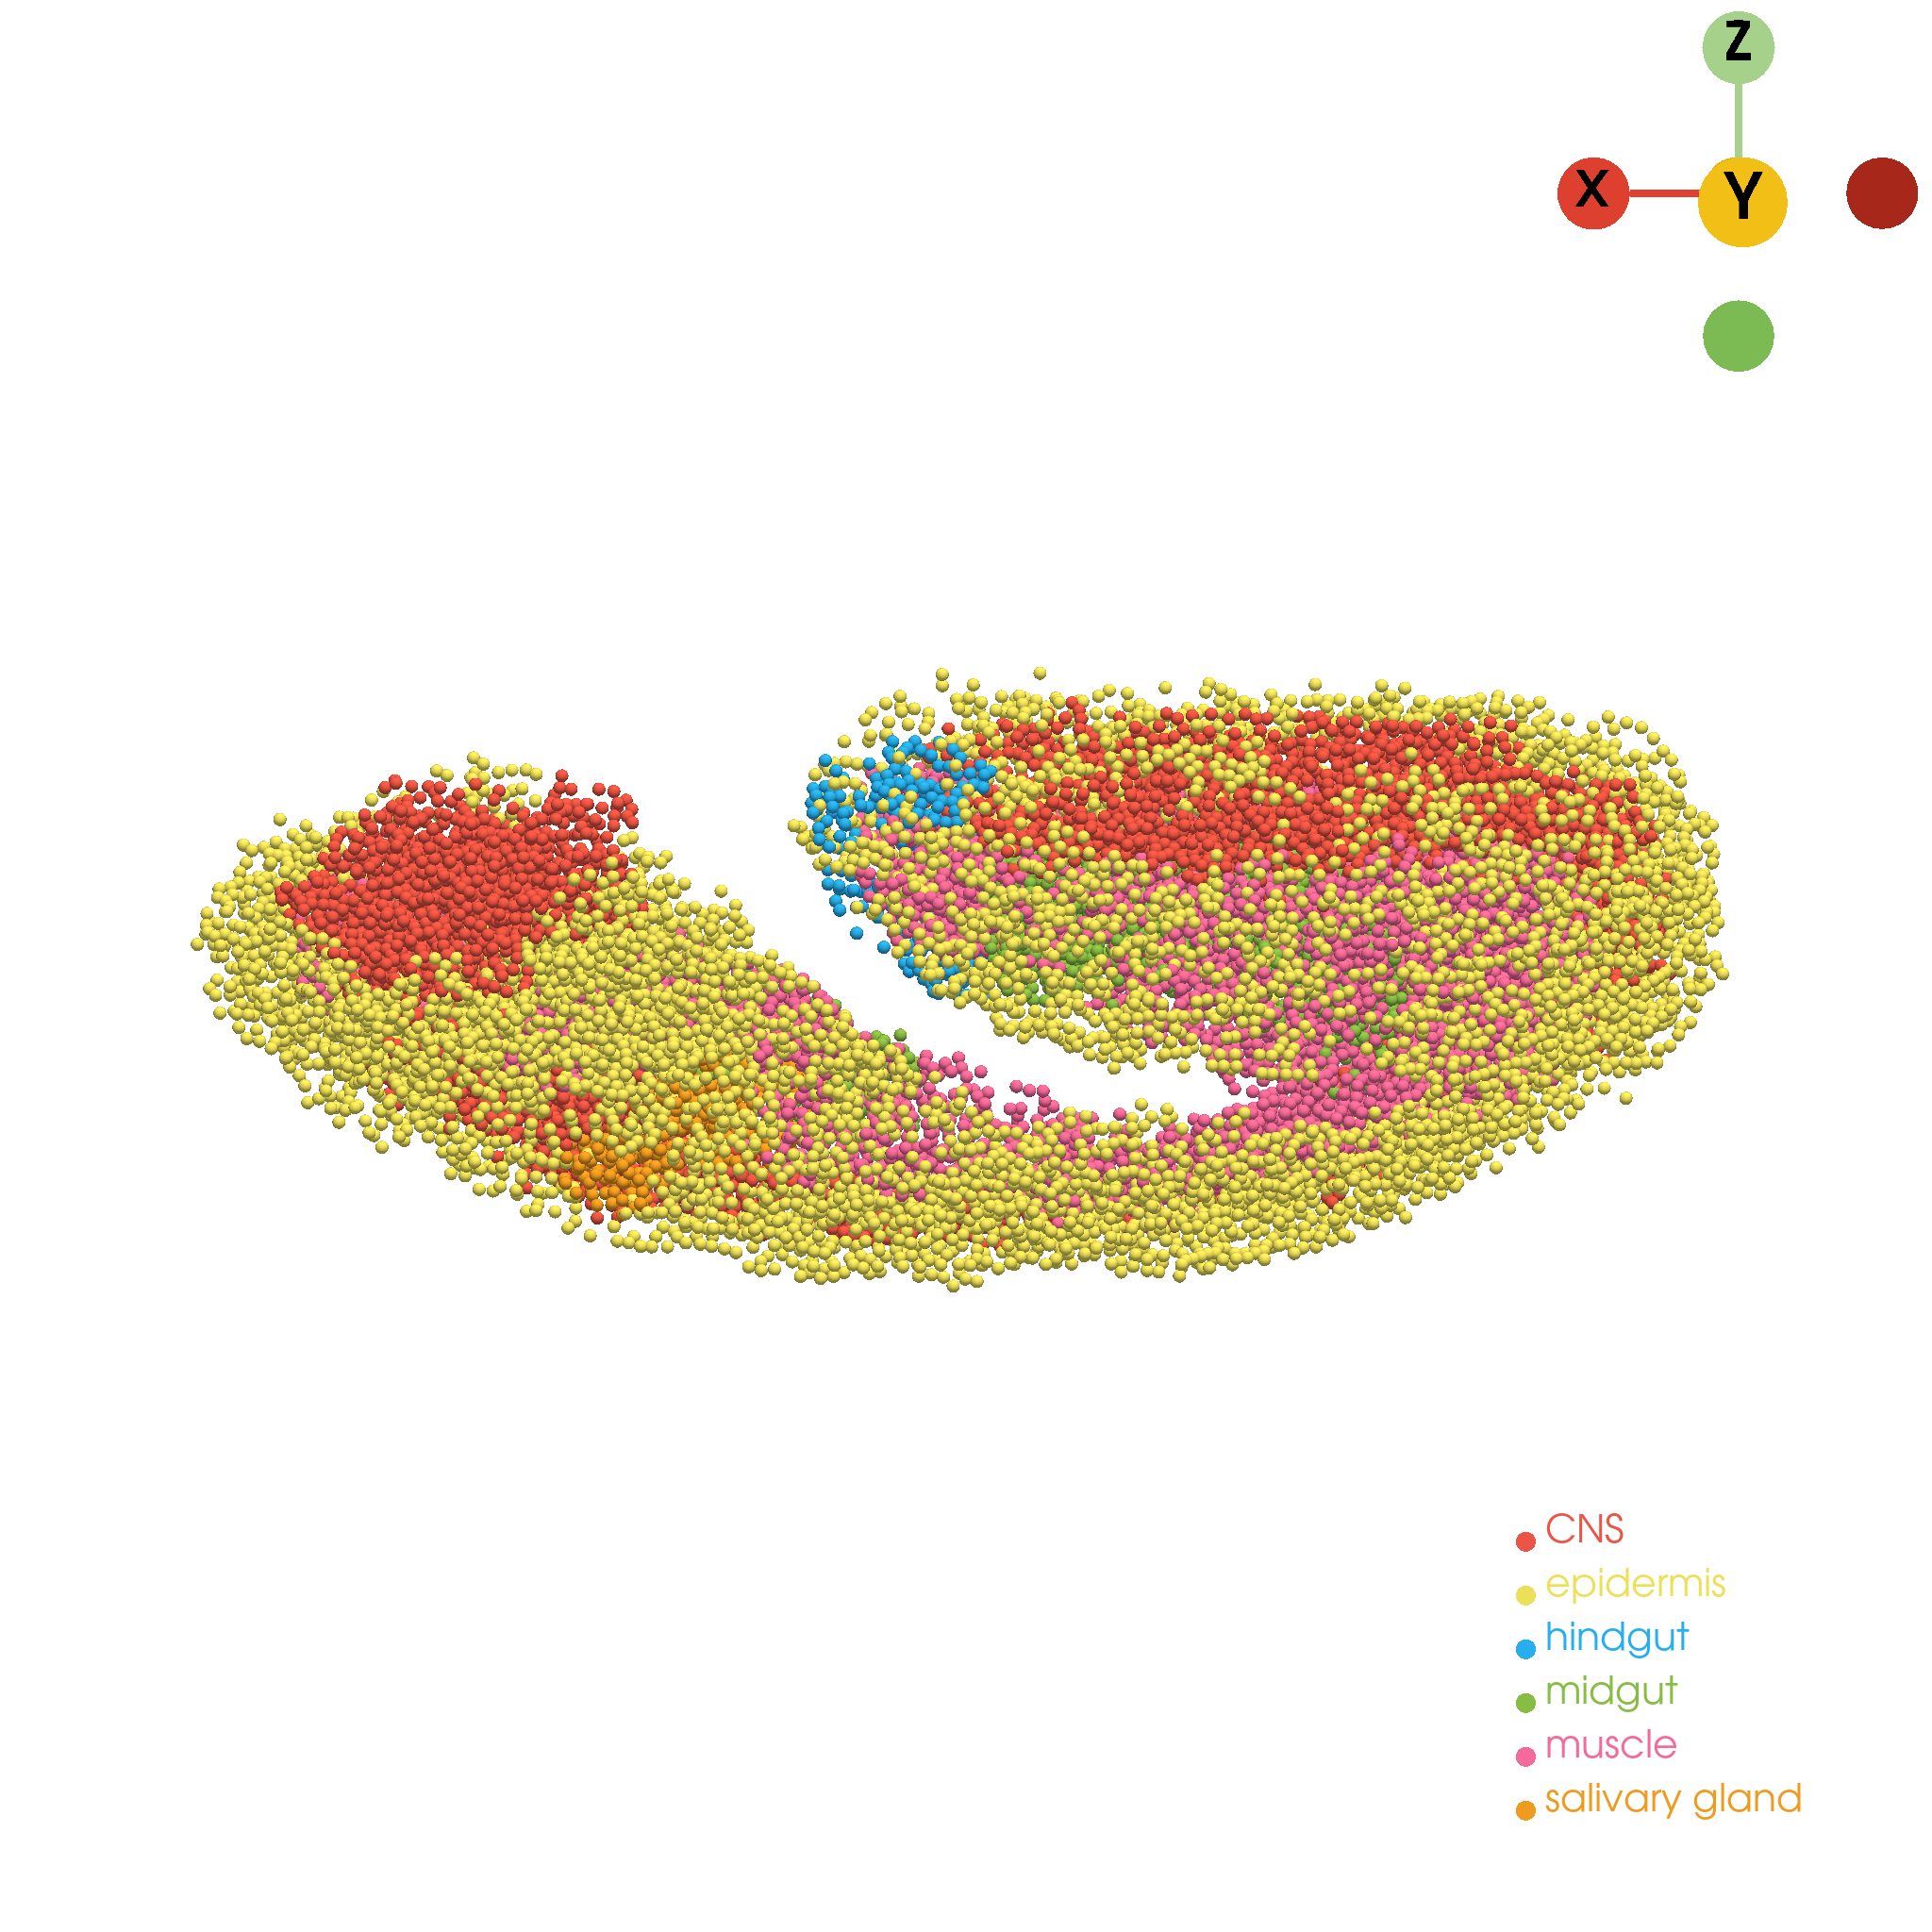

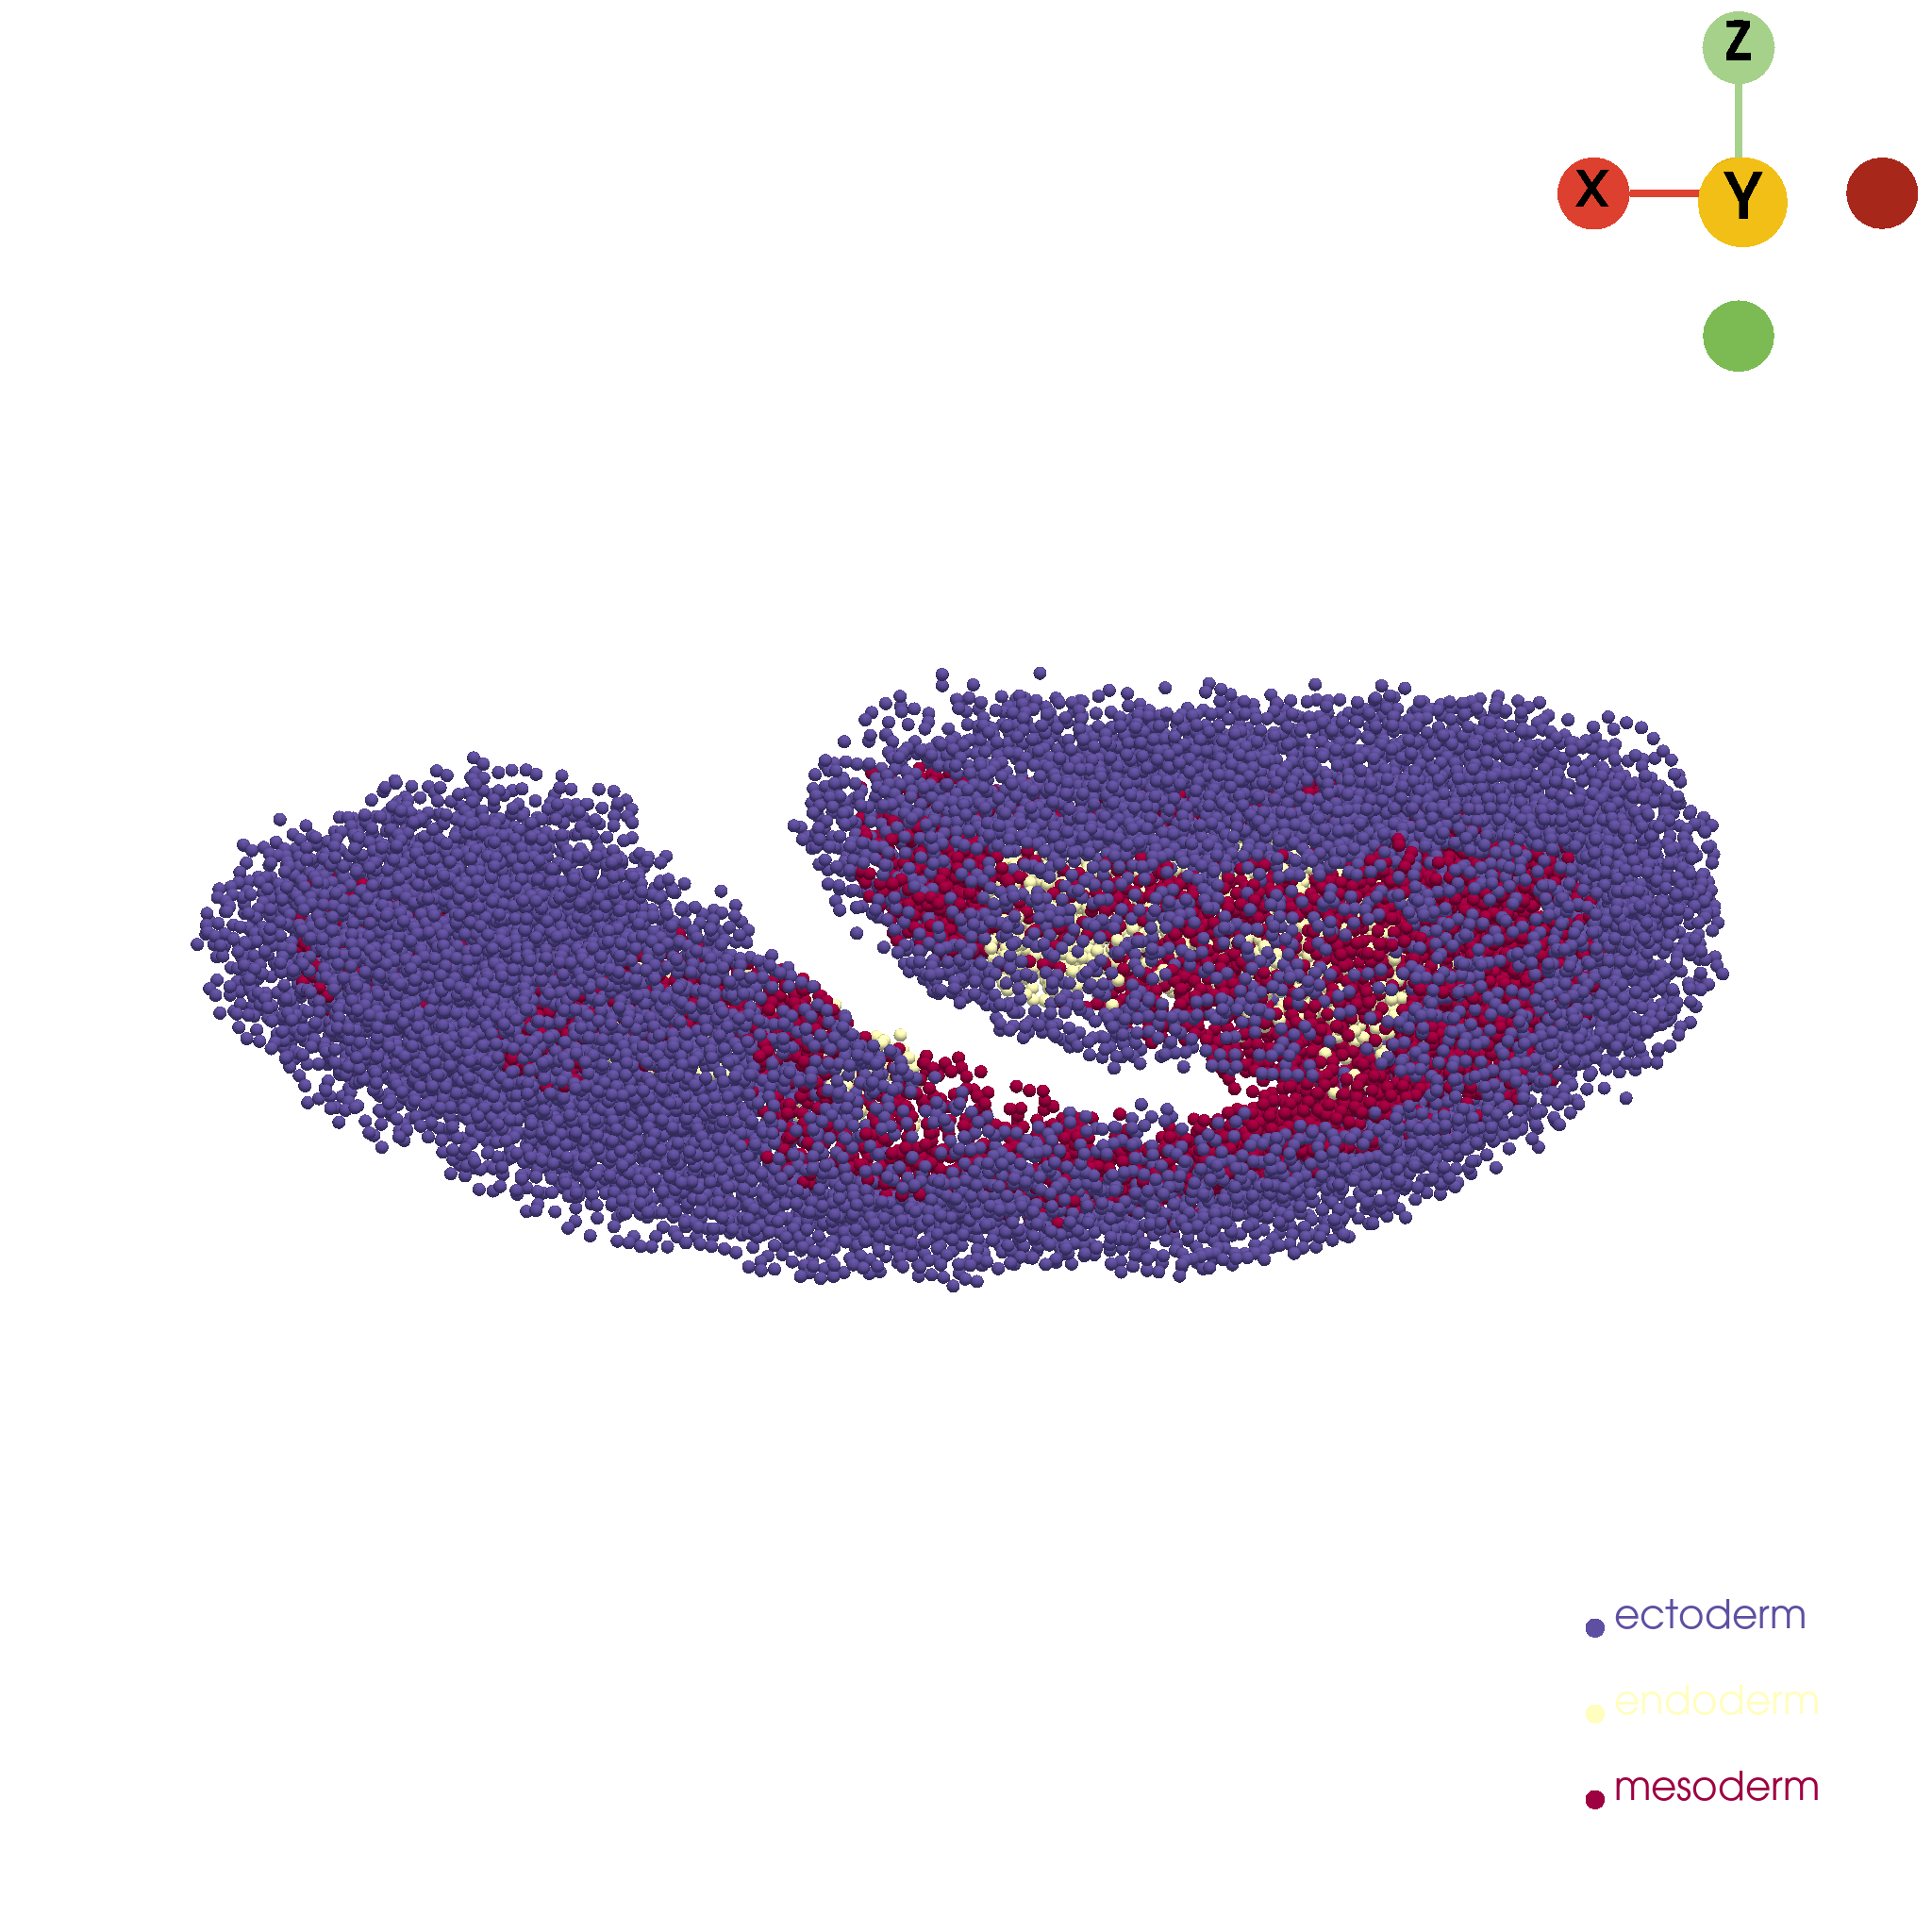

In [68]:
st.pl.three_d_plot(
    model=germ_pc,
    key="tissue",
    model_style="points",
    model_size=14,
    cpo=cpo,
    window_size=(2048, 2048),
    jupyter="static",
    filename=os.path.join(out_image_path, f"{sample_id}_germband_pc_model_tissue.pdf")
)
st.pl.three_d_plot(
    model=germ_pc,
    key="germ_layer",
    model_style="points",
    model_size=14,
    cpo=cpo,
    window_size=(2048, 2048),
    jupyter="static",
    filename=os.path.join(out_image_path, f"{sample_id}_germband_pc_model_germ_layer.pdf")
)

## Save data

In [163]:
st.tdr.save_model(model=germ_pc, filename=f"pc_models/Germband_{sample_id}_aligned_pc_model.vtk")

obs_index = np.asarray(germ_pc.point_data["obs_index"])
new_germ_adata = new_germ_adata[obs_index, :].copy()
new_germ_adata.write_h5ad(f"h5ad/{sample_id}_germband.h5ad", compression="gzip")